In [1]:
import pandas as pd
import numpy as np

import tubesml as tml

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_columns', 100)

In [2]:
df_train = pd.read_csv('data/train.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
df_test = pd.read_csv('data/test.csv')

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [4]:
_ = tml.list_missing(df_train)
print('_'*40)
_ = tml.list_missing(df_test)

Column Age: 3.29% missing
Column Ticket: 4.62% missing
Column Fare: 0.13% missing
Column Cabin: 67.87% missing
Column Embarked: 0.25% missing
________________________________________
Column Age: 3.49% missing
Column Ticket: 5.18% missing
Column Fare: 0.13% missing
Column Cabin: 70.83% missing
Column Embarked: 0.28% missing


In [5]:
def plot_frame(ax):
    ax.set_facecolor('#292525')
    ax.spines['bottom'].set_color('w')
    ax.tick_params(axis='x', colors='w')
    ax.xaxis.label.set_color('w')
    ax.spines['left'].set_color('w')
    ax.tick_params(axis='y', colors='w')
    ax.yaxis.label.set_color('w')
    return ax

/home/lucabasa/Git/kaggle_competitions/tabular_playground/tabplay/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


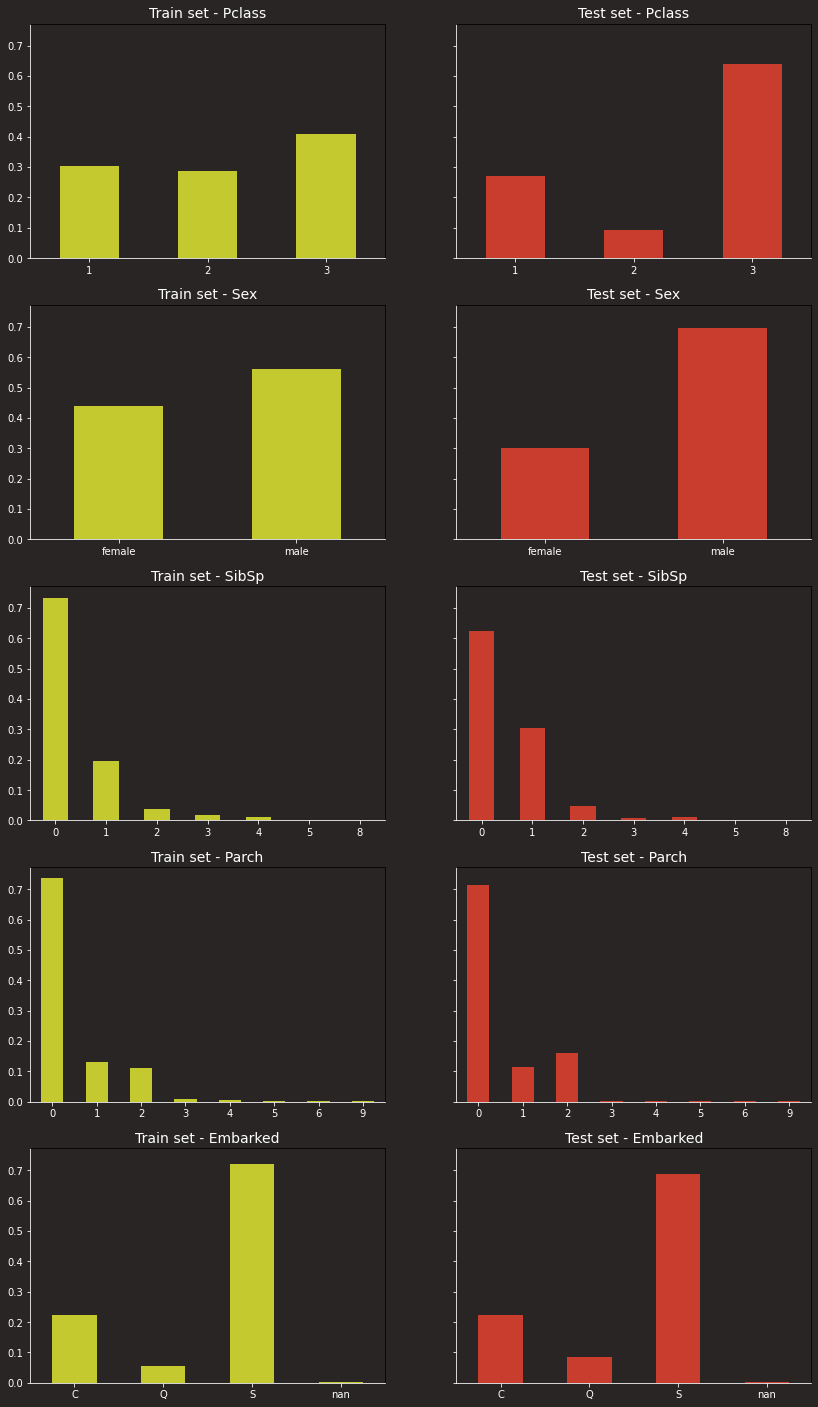

In [6]:
fig, ax = plt.subplots(5, 2, figsize=(14, 25), facecolor='#292525', sharey=True)

i=0

for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    df_train[col].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', ax=ax[i][0], color='#C3C92E')
    df_test[col].value_counts(dropna=False, normalize=True).sort_index().plot(kind='bar', ax=ax[i][1], color='#C93D2E')
    ax[i][0] = plot_frame(ax[i][0])
    ax[i][1] = plot_frame(ax[i][1])
    ax[i][0].set_title(f'Train set - {col}', fontsize=14, color='w')
    ax[i][1].set_title(f'Test set - {col}', fontsize=14, color='w')
    ax[i][0].set_xticklabels(ax[i][0].get_xticklabels(), rotation=0)
    ax[i][1].set_xticklabels(ax[i][1].get_xticklabels(), rotation=0)
    i += 1

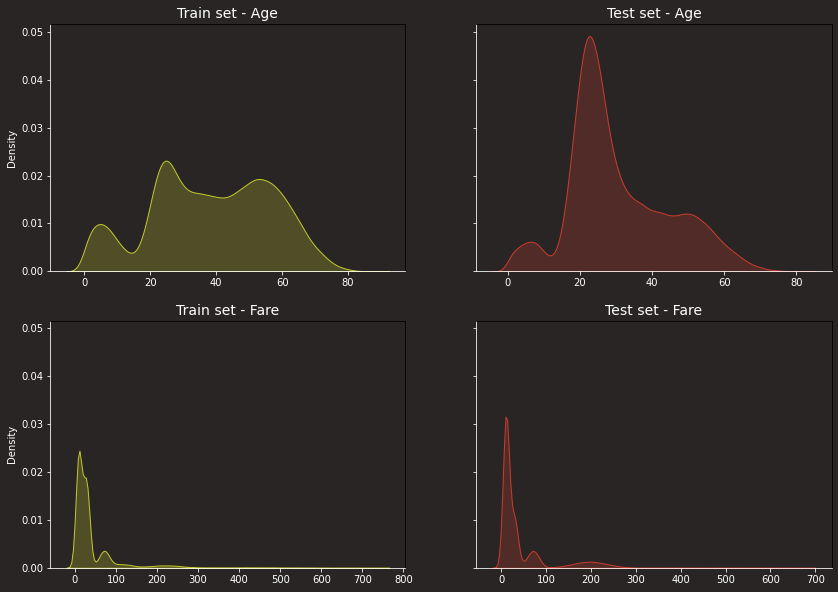

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10), facecolor='#292525', sharey=True)

i=0

for col in ['Age', 'Fare']:
    sns.kdeplot(df_train[col], ax=ax[i][0], shade=True, color='#C3C92E')
    sns.kdeplot(df_test[col], ax=ax[i][1], shade=True, color='#C93D2E')
    ax[i][0] = plot_frame(ax[i][0])
    ax[i][1] = plot_frame(ax[i][1])
    ax[i][0].set_title(f'Train set - {col}', fontsize=14, color='w')
    ax[i][1].set_title(f'Test set - {col}', fontsize=14, color='w')
    ax[i][0].set_xlabel('')
    ax[i][1].set_xlabel('')
    i += 1

In [8]:
df_train.shape

(100000, 12)

In [9]:
df_test.shape

(100000, 11)

In [10]:
len(set(set(df_train.Ticket).intersection(set(df_test.Ticket))))

18151

In [12]:
train, test = tml.make_test(df_train, 0.25, random_state=324, strat_feat=['Pclass', 'Sex'])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3539,3539,0,1,"Beauregard, Dorothy",female,65.0,0,0,31899,107.37,D12882,C
73979,73979,0,3,"Lafleche, Ted",male,65.0,0,0,10818,9.56,NaN,S
34901,34901,1,3,"Westphal, Lawana",female,69.0,0,0,31232,12.03,NaN,S
68546,68546,1,1,"Scott, Catherine",female,19.0,0,0,18047,104.19,A20272,C
74345,74345,1,1,"Moore, Latoya",female,42.0,0,0,14324,117.41,C17491,C


In [13]:
train.groupby('Embarked').Survived.mean()

Embarked
C    0.750314
Q    0.596686
S    0.316018
Name: Survived, dtype: float64

In [16]:
train.groupby(['Embarked', 'Sex']).Survived.mean().unstack()

Sex,female,male
Embarked,,
C,0.846368,0.513491
Q,0.702239,0.342327
S,0.627565,0.159522


In [17]:
train.groupby('Embarked').Pclass.mean()

Embarked
C    1.657244
Q    1.459941
S    2.294474
Name: Pclass, dtype: float64

In [18]:
train.groupby(['Embarked', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Embarked,,,
C,0.773080,0.817221,0.588644
Q,0.632704,0.640065,0.391653
S,0.408677,0.436883,0.205384


In [19]:
train.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.770041,0.768801,0.572904
male,0.364284,0.246740,0.106290


In [20]:
train.groupby(['Embarked', 'Pclass']).size().unstack()

Pclass,1,2,3
Embarked,,,
C,8893,4634,3170
Q,2807,614,623
S,10972,16208,26896


In [22]:
col = 'Embarked'

print(train[train[col].isna()].Survived.mean())
print(train[train[col].notna()].Survived.mean())

0.4808743169398907
0.4281112581365198


In [23]:
col = 'Age'

print(train[train[col].isna()].Survived.mean())
print(train[train[col].notna()].Survived.mean())

0.41359773371104813
0.42873884928787104


In [24]:
col = 'Cabin'

print(train[train[col].isna()].Survived.mean())
print(train[train[col].notna()].Survived.mean())

0.3424606446040906
0.6099193481333666


In [25]:
col = 'Ticket'

print(train[train[col].isna()].Survived.mean())
print(train[train[col].notna()].Survived.mean())

0.5284319356691557
0.4233619508375514
